## Factor Analysis for Long Treatment time

Question: Which factors influence a longer treatment time after a concussion?

General Notes:
- raw data includes patients from Concussion Clinic only
- Subjects will not need to verify injury date (doing so reduces population to 150 people)
- Ideal subject to variable ration = 5-10:1 (Thus, only include absolutely necessary variables)
- Needed to dummify (1,0s) some variables for the analysis
- some variables likely will need to be binned

In [12]:
#load packages
library(psych)
install.packages("GPArotation", repos='http://cran.us.r-project.org') #if not already installed
library(GPArotation)

package 'GPArotation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MB047320\AppData\Local\Temp\Rtmpu05zkt\downloaded_packages


In [15]:
#load data
final <- read.csv('C:/Users/MB047320/OneDrive - Cerner Corporation/KUMC/Dissertation/data/Mark_dissertation_20170718/factor_analysis.csv')
head(final)
dim(final)

X,age,sex_male,race_white,religious,concussion_hxdx,historical_dx_count,impact_verbal_memory,impact_visual_memory,impact_comment,impact_impulse_control,impact_reaction_time,impact_total_symptom,impact_visual_motor
19,19,0,0,0,1,0,77,93,0.53,7,0.76,63,42.58
24,15,0,0,0,0,1,66,72,0.32,8,1.06,43,38.17
28,18,1,1,0,0,0,74,64,0.46,8,0.69,34,39.00
29,15,1,0,0,0,0,88,65,0.45,3,0.80,50,29.25
53,16,0,1,1,0,0,80,58,0.36,8,0.74,54,39.53
58,18,0,1,1,0,0,91,80,0.49,2,0.89,36,33.50


[1] 81 14

In [18]:
#standardized variables (rescaled to mean of 0 and SD of 1). Makes it easier for comparison across units.
final_stan = as.data.frame(scale(final))
head(final_stan)

X,age,sex_male,race_white,religious,concussion_hxdx,historical_dx_count,impact_verbal_memory,impact_visual_memory,impact_comment,impact_impulse_control,impact_reaction_time,impact_total_symptom,impact_visual_motor
-1.699313,0.4661388,-0.8888889,-2.0846292,-1.1684549,1.4873956,-0.332782,-0.7760388,1.3122778,1.39214088,-0.15089433,-0.1051182,1.5492975,0.9031889
-1.673928,-0.4068611,-0.8888889,-2.0846292,-1.1684549,-0.6640159,1.592599,-1.6894477,-0.2197637,-0.43645498,-0.05614673,1.5753904,0.7184925,0.2340997
-1.653620,0.2478889,1.1111111,0.4737794,-1.1684549,-0.6640159,-0.332782,-1.0251503,-0.8033986,0.78260893,-0.05614673,-0.4972369,0.3446302,0.3600281
-1.648542,-0.4068611,1.1111111,-2.0846292,-1.1684549,-0.6640159,-0.332782,0.1373701,-0.7304442,0.69553293,-0.52988475,0.1189496,1.0092742,-1.1192506
-1.526693,-0.1886111,-0.8888889,0.4737794,0.8452652,-0.6640159,-0.332782,-0.5269272,-1.2411247,-0.08815101,-0.05614673,-0.2171521,1.1754353,0.4404401
-1.501308,0.2478889,-0.8888889,0.4737794,0.8452652,-0.6640159,-0.332782,0.3864817,0.3638711,1.04383690,-0.62463235,0.6231022,0.4277107,-0.4744369


ss loadings in outputs = eigenvalues (i.e. variance in all variables which is accounted for by that factor. 
- the eigenvalue/ number of variables = proportion variance) <br>


<br>
As a rule-of-thumb a factor is important if its eigenvalue is greater than 1 (i.e., the average) <br>
- (this is also referred to as the Kaiser Rule)

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
" A loading greater than abs(1) was detected.  Examine the loadings carefully."The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"

Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


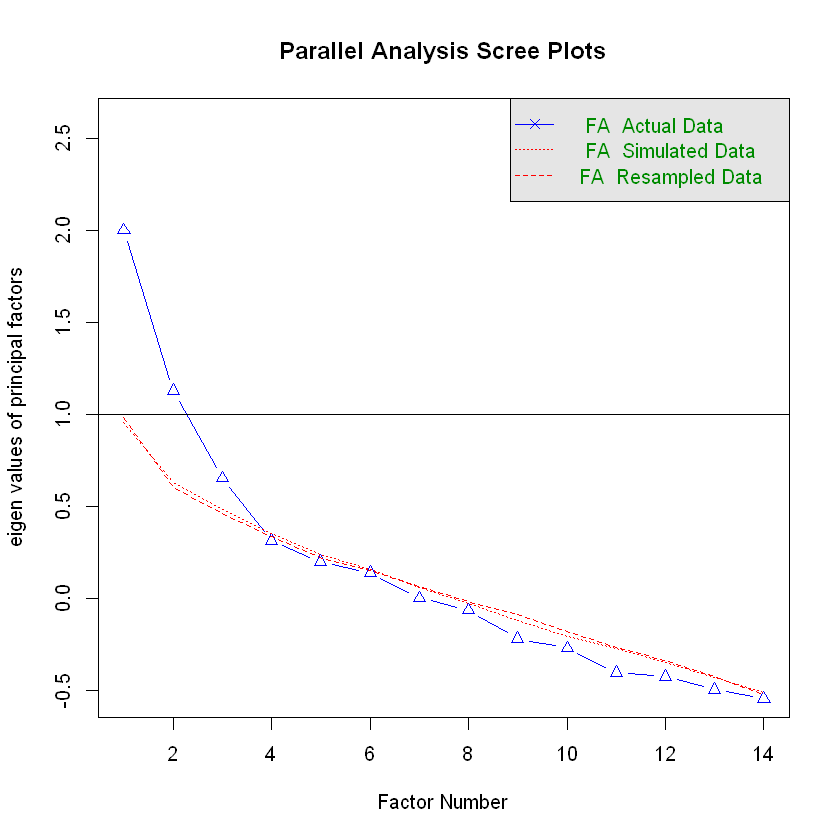

In [21]:
#parallel analysis for # of factors
parallel <- fa.parallel(final_stan, fm = 'minres', fa = 'fa')


Parallel analysis suggests that there are likely 3 factors in this sample to consider.


In [23]:
threefactor <- fa(final_stan,nfactors = 3,rotate = "oblimin",fm="minres") #oblique rotation, as there appears to be some correlations
print(threefactor)
print(threefactor$loadings,cutoff = 0.3)#prints factors with a loading >= 0.3

Factor Analysis using method =  minres
Call: fa(r = final_stan, nfactors = 3, rotate = "oblimin", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
                         MR1   MR2   MR3   h2   u2 com
X                      -0.20 -0.34  0.09 0.13 0.87 1.8
age                     0.03 -0.05  0.63 0.41 0.59 1.0
sex_male               -0.30 -0.29  0.09 0.14 0.86 2.2
race_white              0.02  0.06  0.13 0.02 0.98 1.4
religious              -0.03 -0.26 -0.35 0.18 0.82 1.9
concussion_hxdx         0.30  0.35  0.25 0.22 0.78 2.8
historical_dx_count    -0.13  0.00  0.57 0.34 0.66 1.1
impact_verbal_memory    0.84 -0.04  0.00 0.73 0.27 1.0
impact_visual_memory    0.62  0.11 -0.10 0.37 0.63 1.1
impact_comment          0.68 -0.14  0.02 0.52 0.48 1.1
impact_impulse_control -0.05  0.39 -0.11 0.18 0.82 1.2
impact_reaction_time   -0.09  0.67  0.02 0.48 0.52 1.0
impact_total_symptom    0.19  0.45  0.02 0.20 0.80 1.3
impact_visual_motor     0.29 -0.54  0.09 0.47 0.

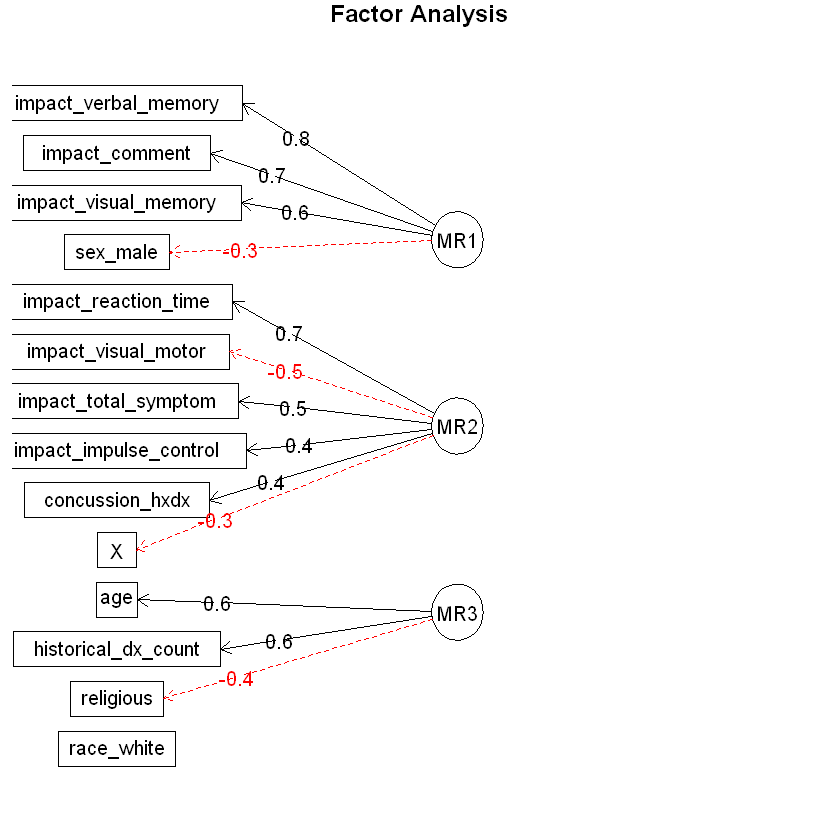

In [25]:
fa.diagram(threefactor) #plots loadings

interpretations: <br>
RMSR = 0.06 (meh, want close 0) <br>
RMSEA index =  0.077 (good fit = < 0.05) <br>
Tucker Lewis Index of factoring reliability =  0.776 (want over 0.9)<br>

The summary statistics from above indicate that the current structure isn't the best fit. Either more data is needed (which is likely anyway), or a different modeling structure coculd be warranted.
